# Importing Pokemon Dataset


In [ ]:
pip install requests pandas


In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
def fetch_pokemon_species(pokemon_id_or_name):
    url = f"https://pokeapi.co/api/v2/pokemon-species/{pokemon_id_or_name}/"
    response = requests.get(url)

    if response.status_code == 200:
        return response.json()
pokemon_data_list = []
for pokemon_id in range(1, 501):
    pokemon_data = fetch_pokemon_species(pokemon_id)
    if pokemon_data:
        pokemon_data_list.append(pokemon_data)


In [ ]:
data_dict = {
    "id": [data["id"] for data in pokemon_data_list],
    "name": [data["name"] for data in pokemon_data_list],
    "base_happiness": [data["base_happiness"] for data in pokemon_data_list],
    "capture_rate": [data["capture_rate"] for data in pokemon_data_list],
    "forms_switchable": [data["forms_switchable"] for data in pokemon_data_list],
    "gender_rate": [data["gender_rate"] for data in pokemon_data_list],
    "habitat_name": [data["habitat"]["name"] if data.get("habitat") else None for data in pokemon_data_list],
    "has_gender_differences": [data["has_gender_differences"] for data in pokemon_data_list],
    "hatch_counter": [data["hatch_counter"] for data in pokemon_data_list],
    "is_baby": [data["is_baby"] for data in pokemon_data_list],
    "is_legendary": [data["is_legendary"] for data in pokemon_data_list],
    "is_mythical": [data["is_mythical"] for data in pokemon_data_list],
    "shape_name": [data["shape"]["name"] if data.get("shape") else None for data in pokemon_data_list],
    "growth_rate": [data["growth_rate"]["name"] if data.get("growth_rate") else None for data in pokemon_data_list]
}

df = pd.DataFrame(data_dict)


In [ ]:
df

,id,name,base_happiness,capture_rate,forms_switchable,gender_rate,habitat_name,has_gender_differences,hatch_counter,is_baby,is_legendary,is_mythical,shape_name,growth_rate
0,1,bulbasaur,50,45,False,1,grassland,False,20,False,False,False,quadruped,medium-slow
1,2,ivysaur,50,45,False,1,grassland,False,20,False,False,False,quadruped,medium-slow
2,3,venusaur,50,45,True,1,grassland,True,20,False,False,False,quadruped,medium-slow
3,4,charmander,50,45,False,1,mountain,False,20,False,False,False,upright,medium-slow
4,5,charmeleon,50,45,False,1,mountain,False,20,False,False,False,upright,medium-slow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,servine,70,45,False,1,None,False,20,False,False,False,upright,medium-slow
496,497,serperior,70,45,False,1,None,False,20,False,False,False,squiggle,medium-slow
497,498,tepig,70,45,False,1,None,False,20,False,False,False,quadruped,medium-slow
498,499,pignite,70,45,False,1,None,False,20,False,False,False,upright,medium-slow


#Task #1

In [ ]:
pokemon = df.nlargest(10, 'base_happiness')
pokemon['name']

34     clefairy
35     clefable
112     chansey
172      cleffa
241     blissey
427     lopunny
439     happiny
479        uxie
480     mesprit
481       azelf
Name: name, dtype: object

Top 10 :  clefairy, clefable, chansey, cleffa, blissey, lopunny, happiny, uxie,mesprit, and azelf

#Task #2 and #3

In [ ]:
df.corr()

<ipython-input-70-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,base_happiness,capture_rate,forms_switchable,gender_rate,has_gender_differences,hatch_counter,is_baby,is_legendary,is_mythical
id,1.000000,0.002650,-0.171285,0.079822,-0.138053,0.047523,0.248379,0.096918,0.168691,0.160042
base_happiness,0.002650,1.000000,0.118642,-0.163199,0.224616,0.040445,-0.213831,0.044170,-0.159451,0.053244
capture_rate,-0.171285,0.118642,1.000000,-0.247369,0.331989,0.003387,-0.371695,0.065179,-0.285516,-0.148763
forms_switchable,0.079822,-0.163199,-0.247369,1.000000,-0.077325,0.032392,0.220610,-0.067242,0.121661,0.088371
gender_rate,-0.138053,0.224616,0.331989,-0.077325,1.000000,0.155904,-0.449167,0.072534,-0.353164,-0.278928
has_gender_differences,0.047523,0.040445,0.003387,0.032392,0.155904,1.000000,-0.152621,-0.092376,-0.111955,-0.068288
hatch_counter,0.248379,-0.213831,-0.371695,0.220610,-0.449167,-0.152621,1.000000,-0.042698,0.738483,0.473977
is_baby,0.096918,0.044170,0.065179,-0.067242,0.072534,-0.092376,-0.042698,1.000000,-0.045260,-0.027607
is_legendary,0.168691,-0.159451,-0.285516,0.121661,-0.353164,-0.111955,0.738483,-0.045260,1.000000,-0.033458
is_mythical,0.160042,0.053244,-0.148763,0.088371,-0.278928,-0.068288,0.473977,-0.027607,-0.033458,1.000000


In [ ]:
correlation_matrix = df.corr()

<ipython-input-71-68bbfff3c4eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


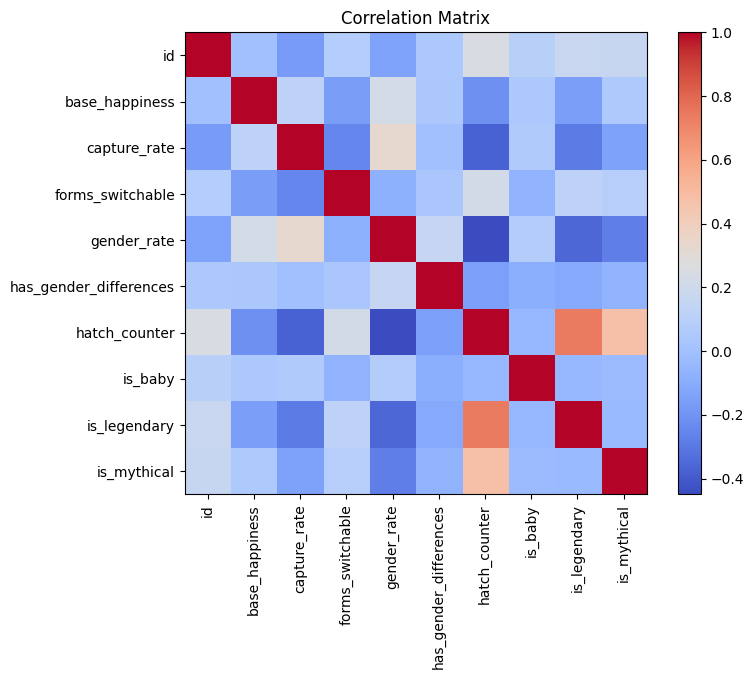

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()


If you were to minimize the number of columns, which specific columns
would you select? Kindly elaborate on your choice and reasoning ?

I think, we can remove **has_gender_difference** and **is_baby** collumn
The reason is they are not really have a good correlation with each collumn 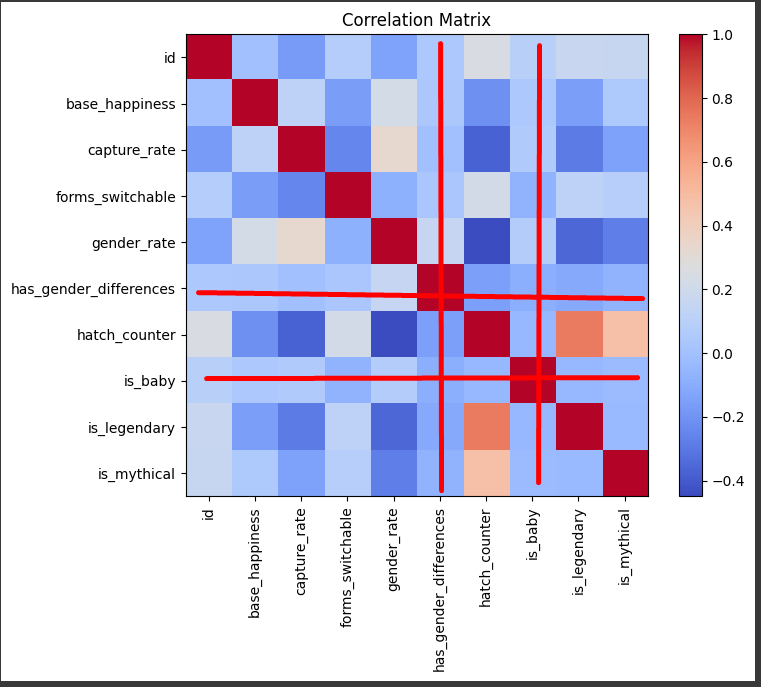

Determine which columns exhibit the highest degree of correlation.


From Correlation Matrix we can see the highest degree of correlation are

**Hacth_counter & is_legendary**

Hatch Counter :  how long it takes to hatch an egg

Is_legendary : are the eggs legendary ?
               False  = No
                ; True   = Yes

We gonna see why

In [ ]:
high_corr_1 = df.loc[(df['is_legendary'] == True)]
high_corr_2 = high_corr_1[['is_legendary', 'hatch_counter']].copy()
print(high_corr_2)

     is_legendary  hatch_counter
143          True             80
144          True             80
145          True             80
149          True            120
242          True             80
243          True             80
244          True             80
248          True            120
249          True            120
376          True             80
377          True             80
378          True             80
379          True            120
380          True            120
381          True            120
382          True            120
383          True            120
479          True             80
480          True             80
481          True             80
482          True            120
483          True            120
484          True             10
485          True            120
486          True            120
487          True            120


In [ ]:
high_corr_2['hatch_counter'].unique()

array([ 80, 120,  10])

In [ ]:
high_corr_3 = df.loc[(df['is_legendary'] == False)]
high_corr_4 = high_corr_3[['is_legendary', 'hatch_counter']].copy()
print(high_corr_4)

     is_legendary  hatch_counter
0           False             20
1           False             20
2           False             20
3           False             20
4           False             20
..            ...            ...
495         False             20
496         False             20
497         False             20
498         False             20
499         False             20

[474 rows x 2 columns]


In [ ]:
high_corr_4['hatch_counter'].unique()

array([ 20,  15,  10,  25,  40,   5,  35,  30, 120])

Some legendary eggs that hatch faster must have specific conditions, just as some non-legendary eggs that hatch longer



**But for now, We can conclude that legendary eggs require longer hatching times than other kinds of eggs**

# My perspective on establishing an Extract, Transform, Load (ETL)

To establish an Extract, Transform, Load (ETL) procedure for transferring data from the Pokémon API v2 to a relational database like PostgreSQL, MySQL, or BigQuery, you need to follow these steps:

Understanding the Pokémon API v2:
First, familiarize yourself with the Pokémon API v2 and its endpoints. Understand the data structure, available fields, and the rate limits for data retrieval. This will help you plan the extraction process and identify the data you need to store in the relational database.

Extracting Data:
Design a data extraction process to retrieve data from the Pokémon API v2. Since the data is updated daily, you should set up a daily scheduled job to extract new and modified data. You can use Python, Node.js, or any other programming language of your choice to interact with the API and fetch the data. Store the extracted data in a temporary staging area.

Transforming Data:
Once the data is extracted, it might need to be transformed before loading it into the relational database. Transformation involves cleaning, validating, and structuring the data in a way that fits the database schema. Consider the following tasks during data transformation:

Handle missing or null values.
Convert data types to match the database schema.
Merge, split, or reformat data as required.
Apply any necessary business rules or data logic.
You can perform these transformations using tools like Python, SQL, or ETL-specific frameworks like Apache NiFi or Apache Spark.

Designing the Relational Database Schema:
Before loading the data into the relational database, you need to design an appropriate database schema. Identify the tables and relationships required to store the Pokémon data efficiently. Create tables with the necessary columns and data types to match the transformed data.

Loading Data into the Relational Database:
Once the data is transformed and the database schema is set up, you can start loading the data into the relational database. Depending on the database system you choose (PostgreSQL, MySQL, or BigQuery), there are different methods for loading data:

PostgreSQL or MySQL: You can use SQL INSERT statements or bulk loading utilities like COPY or LOAD DATA INFILE.
BigQuery: You can use the BigQuery API or bq load command to load data into BigQuery tables.
Scheduling the ETL Process:
Since the data is updated daily, schedule the ETL process to run at a specific time each day to fetch new data from the Pokémon API v2 and update the relational database accordingly. Use cron jobs, Airflow, or any other scheduling tool to automate this process.

Error Handling and Monitoring:
Implement error handling mechanisms to capture and handle any issues that might occur during the ETL process. Monitor the ETL pipeline to ensure it runs smoothly and efficiently.

Testing and Validation:
Test the ETL procedure thoroughly to ensure the data is extracted, transformed, and loaded correctly into the relational database. Validate the data in the database against the original Pokémon API v2 data to ensure data integrity and accuracy.

By following these steps, you can establish a robust ETL procedure to transfer data from the Pokémon API v2 to a relational database, enabling you to work with the data effectively for analysis, reporting, and other data-driven tasks.